In [1]:
pip install geopy

In [2]:
pip install geopandas

     |████████████████████████████████| 994 kB 4.3 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 
     |████████████████████████████████| 6.6 MB 29.4 MB/s 


In [3]:
import geopy
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser
import seaborn as sns
from scipy.stats import norm
from scipy.stats import genextreme as gev
from scipy.stats import pareto 
from scipy import stats
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
data10 = pd.read_csv('https://raw.githubusercontent.com/jehee1122/MLC-Final_traffic-problem-in-NYC/main/Data%20Cleaning/clean_seg10.csv')
data10

,Unnamed: 0,Segment ID,day,LBoro,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,5:00-6:00AM,6:00-7:00AM,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,10:00-11:00AM,11:00-12:00PM,12:00-1:00PM,1:00-2:00PM,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,daily_volume
0,0,1416,Weekday,5.0,37.400000,19.500000,10.400000,11.600000,30.700000,79.000000,174.300000,328.700000,318.000000,214.500000,234.600000,252.800000,272.700000,295.200000,360.800000,371.800000,375.600000,401.500,360.300000,292.600000,228.200000,167.000000,108.700000,74.800000,5020.700000
1,1,1416,Weekend,5.0,92.125000,56.250000,30.625000,24.625000,21.000000,22.750000,47.625000,78.000000,156.500000,223.125000,295.250000,344.875000,361.250000,364.750000,342.875000,320.250000,311.000000,292.750,268.750000,223.250000,188.000000,142.375000,119.875000,89.125000,4417.000000
2,2,1883,Weekday,5.0,37.000000,20.916667,12.916667,6.583333,24.333333,66.250000,168.833333,387.833333,306.250000,206.916667,209.333333,223.333333,262.500000,282.166667,362.916667,376.916667,384.333333,375.250,363.166667,293.250000,227.500000,168.500000,115.250000,86.750000,4969.000000
3,3,1883,Weekend,5.0,96.875000,64.625000,31.625000,22.000000,14.750000,21.625000,48.125000,98.375000,172.375000,248.625000,290.500000,347.500000,376.125000,340.625000,337.500000,324.875000,308.375000,295.625,295.625000,247.750000,190.625000,154.250000,109.125000,92.250000,4529.750000
4,4,2147,Weekday,5.0,52.388889,31.722222,21.333333,17.777778,34.277778,82.111111,208.833333,453.611111,381.777778,257.666667,255.777778,279.888889,301.944444,321.055556,429.277778,458.777778,433.277778,440.000,417.277778,357.611111,264.888889,174.388889,120.777778,77.222222,5873.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,2233,9014615,Weekend,2.0,884.250000,700.500000,541.500000,376.000000,382.750000,359.750000,557.500000,885.500000,1264.500000,1422.500000,1616.000000,1830.000000,1883.250000,1829.250000,1872.750000,1959.250000,1869.000000,1929.750,1842.500000,1800.250000,1653.250000,1272.250000,1065.500000,882.500000,30680.250000
2234,2234,9017020,Weekday,1.0,321.000000,201.200000,130.400000,121.400000,172.400000,415.000000,1127.400000,1473.200000,1407.000000,1296.400000,1262.400000,1295.200000,1212.800000,1274.600000,1308.000000,1313.200000,1351.200000,1345.400,1241.600000,1057.400000,835.000000,681.600000,635.400000,539.200000,22018.400000
2235,2235,9017020,Weekend,1.0,431.250000,334.750000,271.000000,229.750000,208.250000,232.250000,464.000000,582.250000,535.750000,552.750000,537.500000,717.500000,839.000000,872.000000,974.250000,856.500000,1013.500000,1083.250,1150.250000,917.000000,709.750000,636.500000,578.250000,530.250000,15257.500000
2236,2236,9017039,Weekday,4.0,211.600000,129.200000,94.000000,64.400000,97.000000,169.200000,346.200000,804.000000,1227.000000,1136.800000,930.800000,835.600000,865.400000,984.600000,1290.400000,1769.000000,1828.000000,1790.200,1634.000000,1440.800000,948.400000,663.200000,478.000000,358.400000,20096.200000


In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/jehee1122/MLC-Final_traffic-problem-in-NYC/main/Data%20Cleaning/clean_seg8.csv')
data

,Unnamed: 0,Segment ID,day,LBoro,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,5:00-6:00AM,6:00-7:00AM,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,10:00-11:00AM,11:00-12:00PM,12:00-1:00PM,1:00-2:00PM,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,daily_volume
0,0,646,Weekday,5.0,28.250,25.375000,19.000000,16.375000,26.375000,51.875,97.250000,134.250000,182.750,211.500000,200.875000,236.125000,250.375,271.125000,263.625000,293.875000,290.750000,225.875,183.000000,152.625,94.875,72.000,43.000,34.875,3406.000
1,1,1416,Weekday,5.0,37.400,19.500000,10.400000,11.600000,30.700000,79.000,174.300000,328.700000,318.000,214.500000,234.600000,252.800000,272.700,295.200000,360.800000,371.800000,375.600000,401.500,360.300000,292.600,228.200,167.000,108.700,74.800,5020.700
2,2,1416,Weekend,5.0,92.125,56.250000,30.625000,24.625000,21.000000,22.750,47.625000,78.000000,156.500,223.125000,295.250000,344.875000,361.250,364.750000,342.875000,320.250000,311.000000,292.750,268.750000,223.250,188.000,142.375,119.875,89.125,4417.000
3,3,1421,Weekday,5.0,53.750,30.250000,21.750000,19.000000,25.125000,55.000,151.500000,315.500000,353.375,213.000000,219.625000,259.250000,287.125,294.125000,352.125000,400.375000,395.375000,410.375,366.250000,315.625,183.625,140.125,87.875,61.750,5011.875
4,4,1883,Weekday,5.0,37.000,20.916667,12.916667,6.583333,24.333333,66.250,168.833333,387.833333,306.250,206.916667,209.333333,223.333333,262.500,282.166667,362.916667,376.916667,384.333333,375.250,363.166667,293.250,227.500,168.500,115.250,86.750,4969.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,3313,9017037,Weekend,4.0,220.250,148.750000,111.750000,82.750000,108.000000,160.000,287.750000,391.750000,516.250,590.750000,679.250000,728.000000,765.500,701.250000,743.750000,722.500000,708.250000,664.000,651.500000,593.250,514.750,443.000,399.750,301.750,11234.500
3314,3314,9017039,Weekday,4.0,211.600,129.200000,94.000000,64.400000,97.000000,169.200,346.200000,804.000000,1227.000,1136.800000,930.800000,835.600000,865.400,984.600000,1290.400000,1769.000000,1828.000000,1790.200,1634.000000,1440.800,948.400,663.200,478.000,358.400,20096.200
3315,3315,9017039,Weekend,4.0,322.250,214.000000,164.500000,153.250000,135.000000,123.500,151.500000,242.000000,319.500,395.500000,451.750000,530.500000,611.750,727.000000,819.000000,1097.750000,1145.000000,1005.250,849.000000,930.250,783.750,545.500,427.000,379.500,12524.000
3316,3316,9017050,Weekday,1.0,305.800,201.800000,153.800000,141.200000,181.000000,328.000,591.600000,844.200000,856.000,734.600000,662.600000,668.200000,668.400,749.400000,725.400000,766.400000,836.400000,867.800,822.800000,726.600,657.000,581.600,525.000,443.400,14039.000


In [6]:
data=data.dropna(subset=['daily_volume'])

In [7]:
data

,Unnamed: 0,Segment ID,day,LBoro,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,5:00-6:00AM,6:00-7:00AM,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,10:00-11:00AM,11:00-12:00PM,12:00-1:00PM,1:00-2:00PM,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,daily_volume
0,0,646,Weekday,5.0,28.250,25.375000,19.000000,16.375000,26.375000,51.875,97.250000,134.250000,182.750,211.500000,200.875000,236.125000,250.375,271.125000,263.625000,293.875000,290.750000,225.875,183.000000,152.625,94.875,72.000,43.000,34.875,3406.000
1,1,1416,Weekday,5.0,37.400,19.500000,10.400000,11.600000,30.700000,79.000,174.300000,328.700000,318.000,214.500000,234.600000,252.800000,272.700,295.200000,360.800000,371.800000,375.600000,401.500,360.300000,292.600,228.200,167.000,108.700,74.800,5020.700
2,2,1416,Weekend,5.0,92.125,56.250000,30.625000,24.625000,21.000000,22.750,47.625000,78.000000,156.500,223.125000,295.250000,344.875000,361.250,364.750000,342.875000,320.250000,311.000000,292.750,268.750000,223.250,188.000,142.375,119.875,89.125,4417.000
3,3,1421,Weekday,5.0,53.750,30.250000,21.750000,19.000000,25.125000,55.000,151.500000,315.500000,353.375,213.000000,219.625000,259.250000,287.125,294.125000,352.125000,400.375000,395.375000,410.375,366.250000,315.625,183.625,140.125,87.875,61.750,5011.875
4,4,1883,Weekday,5.0,37.000,20.916667,12.916667,6.583333,24.333333,66.250,168.833333,387.833333,306.250,206.916667,209.333333,223.333333,262.500,282.166667,362.916667,376.916667,384.333333,375.250,363.166667,293.250,227.500,168.500,115.250,86.750,4969.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,3313,9017037,Weekend,4.0,220.250,148.750000,111.750000,82.750000,108.000000,160.000,287.750000,391.750000,516.250,590.750000,679.250000,728.000000,765.500,701.250000,743.750000,722.500000,708.250000,664.000,651.500000,593.250,514.750,443.000,399.750,301.750,11234.500
3314,3314,9017039,Weekday,4.0,211.600,129.200000,94.000000,64.400000,97.000000,169.200,346.200000,804.000000,1227.000,1136.800000,930.800000,835.600000,865.400,984.600000,1290.400000,1769.000000,1828.000000,1790.200,1634.000000,1440.800,948.400,663.200,478.000,358.400,20096.200
3315,3315,9017039,Weekend,4.0,322.250,214.000000,164.500000,153.250000,135.000000,123.500,151.500000,242.000000,319.500,395.500000,451.750000,530.500000,611.750,727.000000,819.000000,1097.750000,1145.000000,1005.250,849.000000,930.250,783.750,545.500,427.000,379.500,12524.000
3316,3316,9017050,Weekday,1.0,305.800,201.800000,153.800000,141.200000,181.000000,328.000,591.600000,844.200000,856.000,734.600000,662.600000,668.200000,668.400,749.400000,725.400000,766.400000,836.400000,867.800,822.800000,726.600,657.000,581.600,525.000,443.400,14039.000


In [8]:
weekday_ori_seg= data.loc[data['day']=='Weekday']
weekend_ori_seg=data.loc[data['day']=='Weekend']

In [9]:
weekday_ori= weekday_ori_seg[['12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM',
       '3:00-4:00AM', '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM',
       '7:00-8:00AM', '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM',
       '11:00-12:00PM', '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM',
       '3:00-4:00PM', '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM',
       '7:00-8:00PM', '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM',
       '11:00-12:00AM']]

In [10]:
weekend_ori= weekend_ori_seg[['12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM',
       '3:00-4:00AM', '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM',
       '7:00-8:00AM', '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM',
       '11:00-12:00PM', '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM',
       '3:00-4:00PM', '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM',
       '7:00-8:00PM', '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM',
       '11:00-12:00AM']]

In [11]:
from sklearn import preprocessing
import numpy as np

In [12]:
cluster= data[['12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM',
       '3:00-4:00AM', '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM',
       '7:00-8:00AM', '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM',
       '11:00-12:00PM', '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM',
       '3:00-4:00PM', '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM',
       '7:00-8:00PM', '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM',
       '11:00-12:00AM']]

In [13]:
data= data[['Segment ID','day', '12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM',
       '3:00-4:00AM', '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM',
       '7:00-8:00AM', '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM',
       '11:00-12:00PM', '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM',
       '3:00-4:00PM', '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM',
       '7:00-8:00PM', '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM',
       '11:00-12:00AM', 'daily_volume']]

In [14]:
for i in (cluster.columns):
  data[i]=data[i]/data['daily_volume']

In [15]:
weekday= data.loc[data['day']=='Weekday']
weekend=data.loc[data['day']=='Weekend']

In [16]:
weekday= weekday[['12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM',
       '3:00-4:00AM', '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM',
       '7:00-8:00AM', '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM',
       '11:00-12:00PM', '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM',
       '3:00-4:00PM', '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM',
       '7:00-8:00PM', '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM',
       '11:00-12:00AM']]

In [17]:
weekend=weekend[['12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM',
       '3:00-4:00AM', '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM',
       '7:00-8:00AM', '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM',
       '11:00-12:00PM', '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM',
       '3:00-4:00PM', '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM',
       '7:00-8:00PM', '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM',
       '11:00-12:00AM']]

In [18]:
weekend

,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,5:00-6:00AM,6:00-7:00AM,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,10:00-11:00AM,11:00-12:00PM,12:00-1:00PM,1:00-2:00PM,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
2,0.020857,0.012735,0.006933,0.005575,0.004754,0.005151,0.010782,0.017659,0.035431,0.050515,0.066844,0.078079,0.081786,0.082579,0.077626,0.072504,0.070410,0.066278,0.060844,0.050543,0.042563,0.032233,0.027139,0.020178
5,0.021386,0.014267,0.006982,0.004857,0.003256,0.004774,0.010624,0.021718,0.038054,0.054887,0.064132,0.076715,0.083034,0.075197,0.074507,0.071720,0.068078,0.065263,0.065263,0.054694,0.042083,0.034053,0.024091,0.020365
7,0.017470,0.011610,0.006410,0.004705,0.003577,0.005943,0.010455,0.020332,0.033593,0.042920,0.073349,0.081850,0.083336,0.082868,0.074064,0.073899,0.065783,0.067103,0.062178,0.054668,0.043910,0.035051,0.025477,0.019451
9,0.024050,0.016127,0.012178,0.007312,0.005656,0.006777,0.010853,0.021375,0.033170,0.048252,0.060048,0.070188,0.078340,0.077423,0.070519,0.073729,0.066417,0.064710,0.062672,0.054723,0.045705,0.034419,0.030139,0.025222
11,0.019502,0.012450,0.007371,0.006235,0.006873,0.011395,0.016196,0.027431,0.042909,0.060101,0.069523,0.073966,0.079324,0.078946,0.073806,0.069543,0.067950,0.062910,0.056913,0.046774,0.038128,0.030359,0.022749,0.018646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,0.036483,0.027272,0.022330,0.019563,0.016308,0.015815,0.025021,0.032637,0.035582,0.042829,0.044593,0.048914,0.050153,0.054332,0.056863,0.059852,0.060536,0.058764,0.055971,0.053728,0.052022,0.046826,0.045059,0.038548
3311,0.028265,0.021940,0.017762,0.015058,0.013649,0.015222,0.030411,0.038162,0.035114,0.036228,0.035229,0.047026,0.054989,0.057152,0.063854,0.056136,0.066426,0.070998,0.075389,0.060102,0.046518,0.041717,0.037899,0.034753
3313,0.019605,0.013240,0.009947,0.007366,0.009613,0.014242,0.025613,0.034870,0.045952,0.052584,0.060461,0.064800,0.068138,0.062419,0.066202,0.064311,0.063042,0.059104,0.057991,0.052806,0.045819,0.039432,0.035582,0.026859
3315,0.025731,0.017087,0.013135,0.012237,0.010779,0.009861,0.012097,0.019323,0.025511,0.031579,0.036071,0.042359,0.048846,0.058049,0.065394,0.087652,0.091424,0.080266,0.067790,0.074277,0.062580,0.043556,0.034095,0.030302


In [19]:
weekday

,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,5:00-6:00AM,6:00-7:00AM,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,10:00-11:00AM,11:00-12:00PM,12:00-1:00PM,1:00-2:00PM,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,0.008294,0.007450,0.005578,0.004808,0.007744,0.015230,0.028553,0.039416,0.053655,0.062096,0.058977,0.069326,0.073510,0.079602,0.077400,0.086282,0.085364,0.066317,0.053729,0.044811,0.027855,0.021139,0.012625,0.010239
1,0.007449,0.003884,0.002071,0.002310,0.006115,0.015735,0.034716,0.065469,0.063338,0.042723,0.046727,0.050352,0.054315,0.058797,0.071862,0.074053,0.074810,0.079969,0.071763,0.058279,0.045452,0.033262,0.021650,0.014898
3,0.010725,0.006036,0.004340,0.003791,0.005013,0.010974,0.030228,0.062950,0.070508,0.042499,0.043821,0.051727,0.057289,0.058686,0.070258,0.079885,0.078888,0.081881,0.073076,0.062975,0.036638,0.027959,0.017533,0.012321
4,0.007446,0.004209,0.002599,0.001325,0.004897,0.013333,0.033977,0.078051,0.061632,0.041642,0.042128,0.044945,0.052828,0.056785,0.073036,0.075854,0.077346,0.075518,0.073086,0.059016,0.045784,0.033910,0.023194,0.017458
6,0.008919,0.005401,0.003632,0.003027,0.005836,0.013980,0.035554,0.077228,0.064998,0.043868,0.043547,0.047651,0.051406,0.054660,0.073085,0.078108,0.073766,0.074911,0.071042,0.060884,0.045098,0.029690,0.020563,0.013147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308,0.018110,0.009776,0.006403,0.005784,0.009604,0.023147,0.052291,0.060074,0.060213,0.055579,0.051566,0.051204,0.051933,0.053026,0.057329,0.051258,0.051957,0.056156,0.057353,0.053177,0.050162,0.045450,0.040211,0.028238
3310,0.014579,0.009138,0.005922,0.005514,0.007830,0.018848,0.051203,0.066908,0.063901,0.058878,0.057334,0.058824,0.055081,0.057888,0.059405,0.059641,0.061367,0.061103,0.056389,0.048023,0.037923,0.030956,0.028858,0.024489
3312,0.008874,0.005257,0.003358,0.003630,0.008460,0.030044,0.067463,0.093296,0.081968,0.073301,0.062568,0.057724,0.053552,0.051860,0.055322,0.053087,0.054779,0.051860,0.046693,0.039383,0.034319,0.025549,0.022178,0.015474
3314,0.010529,0.006429,0.004678,0.003205,0.004827,0.008420,0.017227,0.040008,0.061056,0.056568,0.046317,0.041580,0.043063,0.048994,0.064211,0.088027,0.090962,0.089082,0.081309,0.071695,0.047193,0.033001,0.023786,0.017834


In [20]:
weekday=weekday.dropna()
weekend=weekend.dropna()

In [21]:
weekend.shape

(1614, 24)

In [22]:
from sklearn.cluster import KMeans

In [23]:
def silhouette_score_plot(data,range_n_clusters):
    X=data
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(10, 5)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=324)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors)

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1],
                    marker='o', c="white", alpha=1, s=200)

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()

In [24]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

In [25]:
weekday_ori= weekday_ori.dropna()

In [26]:
weekend_ori= weekend_ori.dropna()

In [27]:
weekend_ori

,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,5:00-6:00AM,6:00-7:00AM,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,10:00-11:00AM,11:00-12:00PM,12:00-1:00PM,1:00-2:00PM,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
2,92.125,56.250,30.625,24.625,21.000,22.750,47.625,78.000,156.500,223.125,295.250,344.875,361.250,364.750,342.875,320.250,311.000,292.750,268.750,223.250,188.000,142.375,119.875,89.125
5,96.875,64.625,31.625,22.000,14.750,21.625,48.125,98.375,172.375,248.625,290.500,347.500,376.125,340.625,337.500,324.875,308.375,295.625,295.625,247.750,190.625,154.250,109.125,92.250
7,79.375,52.750,29.125,21.375,16.250,27.000,47.500,92.375,152.625,195.000,333.250,371.875,378.625,376.500,336.500,335.750,298.875,304.875,282.500,248.375,199.500,159.250,115.750,88.375
9,118.000,79.125,59.750,35.875,27.750,33.250,53.250,104.875,162.750,236.750,294.625,344.375,384.375,379.875,346.000,361.750,325.875,317.500,307.500,268.500,224.250,168.875,147.875,123.750
11,122.375,78.125,46.250,39.125,43.125,71.500,101.625,172.125,269.250,377.125,436.250,464.125,497.750,495.375,463.125,436.375,426.375,394.750,357.125,293.500,239.250,190.500,142.750,117.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,2053.750,1535.250,1257.000,1101.250,918.000,890.250,1408.500,1837.250,2003.000,2411.000,2510.250,2753.500,2823.250,3058.500,3201.000,3369.250,3407.750,3308.000,3150.750,3024.500,2928.500,2636.000,2536.500,2170.000
3311,431.250,334.750,271.000,229.750,208.250,232.250,464.000,582.250,535.750,552.750,537.500,717.500,839.000,872.000,974.250,856.500,1013.500,1083.250,1150.250,917.000,709.750,636.500,578.250,530.250
3313,220.250,148.750,111.750,82.750,108.000,160.000,287.750,391.750,516.250,590.750,679.250,728.000,765.500,701.250,743.750,722.500,708.250,664.000,651.500,593.250,514.750,443.000,399.750,301.750
3315,322.250,214.000,164.500,153.250,135.000,123.500,151.500,242.000,319.500,395.500,451.750,530.500,611.750,727.000,819.000,1097.750,1145.000,1005.250,849.000,930.250,783.750,545.500,427.000,379.500


In [28]:
X=weekday_ori
for n_clusters in range(2,11):
    km = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print('For n_clusters = {} the average silhouette_score is: {}'.format(n_clusters, silhouette_avg))
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

For n_clusters = 2 the average silhouette_score is: 0.7774798874173376
For n_clusters = 3 the average silhouette_score is: 0.6755311824851482
For n_clusters = 4 the average silhouette_score is: 0.5640119717374501
For n_clusters = 5 the average silhouette_score is: 0.5093006420892288
For n_clusters = 6 the average silhouette_score is: 0.45096984218293207
For n_clusters = 7 the average silhouette_score is: 0.44182414000647846
For n_clusters = 8 the average silhouette_score is: 0.4009892731959014
For n_clusters = 9 the average silhouette_score is: 0.37215049094433933
For n_clusters = 10 the average silhouette_score is: 0.37582692182911454


In [29]:
X=weekend_ori
for n_clusters in range(2,11):
    km = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print('For n_clusters = {} the average silhouette_score is: {}'.format(n_clusters, silhouette_avg))
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

For n_clusters = 2 the average silhouette_score is: 0.7892069982399811
For n_clusters = 3 the average silhouette_score is: 0.7054801014145965
For n_clusters = 4 the average silhouette_score is: 0.6089446601379386
For n_clusters = 5 the average silhouette_score is: 0.509225114631978
For n_clusters = 6 the average silhouette_score is: 0.5061471817088099
For n_clusters = 7 the average silhouette_score is: 0.46970535623330095
For n_clusters = 8 the average silhouette_score is: 0.41846875020612184
For n_clusters = 9 the average silhouette_score is: 0.41062361603083364
For n_clusters = 10 the average silhouette_score is: 0.4008762114628688


In [30]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

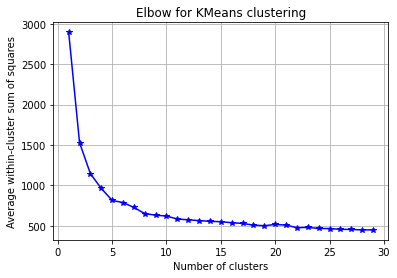

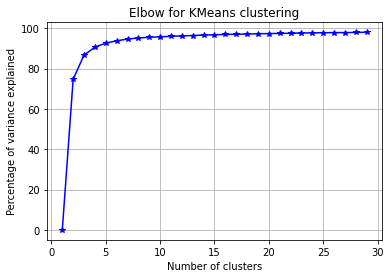

In [31]:
elbow(weekend_ori, range(1,30))

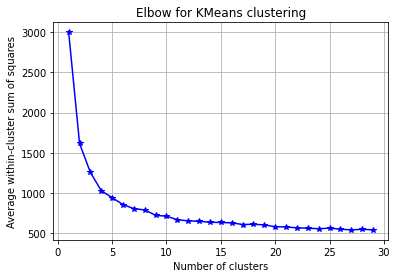

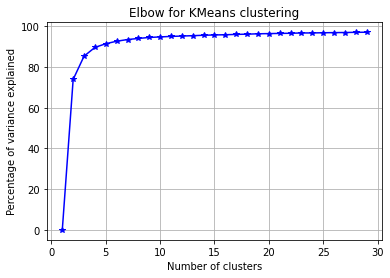

In [32]:
elbow(weekday_ori, range(1,30))

In [33]:
km = KMeans(random_state=234,n_clusters=3)
res_weekday=km.fit(weekday_ori)

In [50]:
weekday_ori_seg['label']= res_weekday.labels_

In [34]:
km = KMeans(random_state=234,n_clusters=3)
res_weekend=km.fit(weekend_ori)

In [35]:
res_weekend

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=234, tol=0.0001, verbose=0)

In [36]:
weekend_ori_seg['label']= res_weekend.labels_

In [62]:
weekday_mean= weekday_ori_seg[['12:00-1:00 AM',
       '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM', '4:00-5:00AM',
       '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM', '8:00-9:00AM',
       '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM', '12:00-1:00PM',
       '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM', '4:00-5:00PM',
       '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM', '8:00-9:00PM',
       '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM',
       'label']].groupby(by='label').mean()
weekday_mean

,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,5:00-6:00AM,6:00-7:00AM,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,10:00-11:00AM,11:00-12:00PM,12:00-1:00PM,1:00-2:00PM,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
label,,,,,,,,,,,,,,,,,,,,,,,,
0,122.671324,80.837462,58.450406,51.805936,68.497639,129.020037,272.843433,444.760046,473.536384,398.050615,361.814094,366.295500,377.886041,390.866613,434.932185,475.783104,492.164808,500.690945,462.372429,394.142713,322.398756,268.305144,225.443621,183.789409
1,1483.375517,917.946124,676.993992,692.788824,1132.689212,2387.330039,3645.781977,3955.541473,3896.803747,3673.830879,3478.583656,3437.903876,3493.757300,3648.629845,3900.243669,3968.411499,3921.563243,3897.475323,3904.772868,3738.033140,3418.263114,3048.441990,2705.207623,2184.941667
2,651.089091,423.583909,302.401247,283.082280,396.751606,788.336465,1467.944036,1820.711220,1831.074810,1635.223946,1515.823299,1495.814797,1514.845035,1578.404017,1735.996026,1862.181440,1880.838623,1887.832458,1841.457084,1691.421315,1472.184309,1286.328699,1154.511942,961.505623


In [55]:
weekend_mean= weekend_ori_seg[['12:00-1:00 AM',
       '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM', '4:00-5:00AM',
       '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM', '8:00-9:00AM',
       '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM', '12:00-1:00PM',
       '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM', '4:00-5:00PM',
       '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM', '8:00-9:00PM',
       '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM',
       'label']].groupby(by='label').mean()
weekend_mean

,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,5:00-6:00AM,6:00-7:00AM,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,10:00-11:00AM,11:00-12:00PM,12:00-1:00PM,1:00-2:00PM,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
label,,,,,,,,,,,,,,,,,,,,,,,,
0,209.422462,161.459895,126.320286,104.367655,98.188616,93.291759,123.392150,177.710251,237.729768,291.811563,335.951103,369.151579,400.698975,414.300644,426.016178,430.126880,426.235648,412.411607,397.909876,368.319152,324.181097,278.999002,246.232470,211.987192
1,2264.657133,1635.948799,1242.240113,1048.559675,1115.919492,1340.804732,1958.596751,2482.605226,2941.222811,3290.161370,3588.464689,3816.079096,3917.459746,3971.877472,4039.498234,4080.040607,4032.532839,3967.890890,3930.272599,3805.845339,3581.870056,3235.464336,2970.208333,2562.151130
2,1066.765901,825.886988,646.751113,544.077203,513.876918,513.139443,695.976954,920.243995,1156.092983,1358.074082,1538.843382,1667.645865,1755.918609,1811.227802,1879.920573,1918.844956,1917.164761,1898.736234,1851.210580,1744.464580,1610.544639,1428.159006,1296.482257,1114.740874


In [63]:
weekday_count= weekday_ori_seg[['12:00-1:00 AM',
       'label']].groupby(by='label').count()
weekday_count

,12:00-1:00 AM
label,
0,1316
1,129
2,242


In [58]:
weekend_count= weekend_ori_seg[['12:00-1:00 AM',
       'label']].groupby(by='label').count()
weekend_count

,12:00-1:00 AM
label,
0,1276
1,118
2,220


In [64]:
weekday_mean=weekday_mean.transpose()

In [56]:
weekend_mean=weekend_mean.transpose()

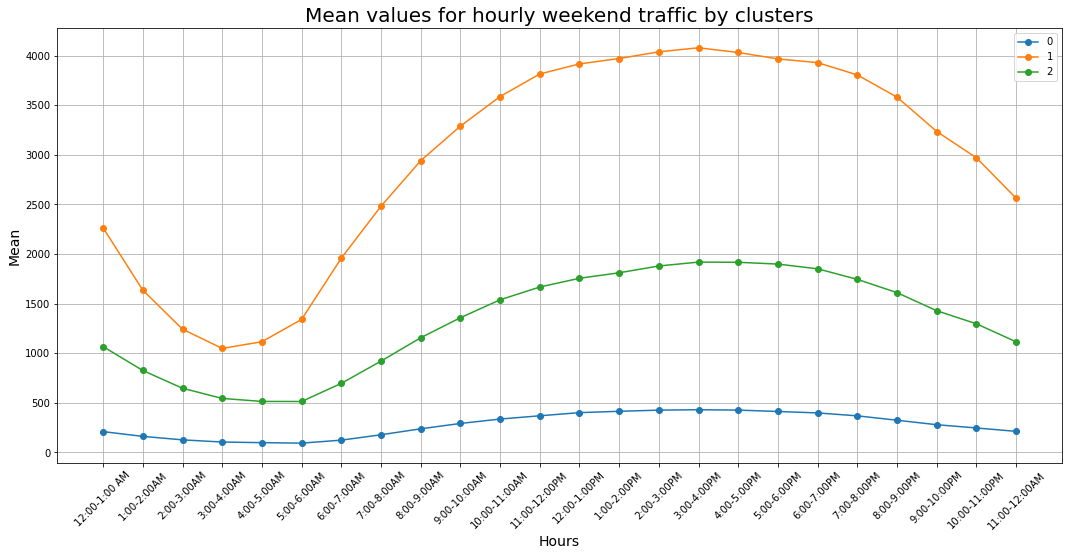

In [61]:
#plotting the line graph
import matplotlib.pyplot as plt

plt.figure(figsize=(18,8))
plt.plot(weekend_mean, marker='o')
plt.title('Mean values for hourly weekend traffic by clusters', fontsize = 20)
plt.xlabel('Hours', fontsize = 14)
plt.ylabel('Mean', fontsize =14)
plt.xticks(rotation = 45)
plt.legend([0,1,2],loc='upper right')
plt.grid(True)
plt.show()

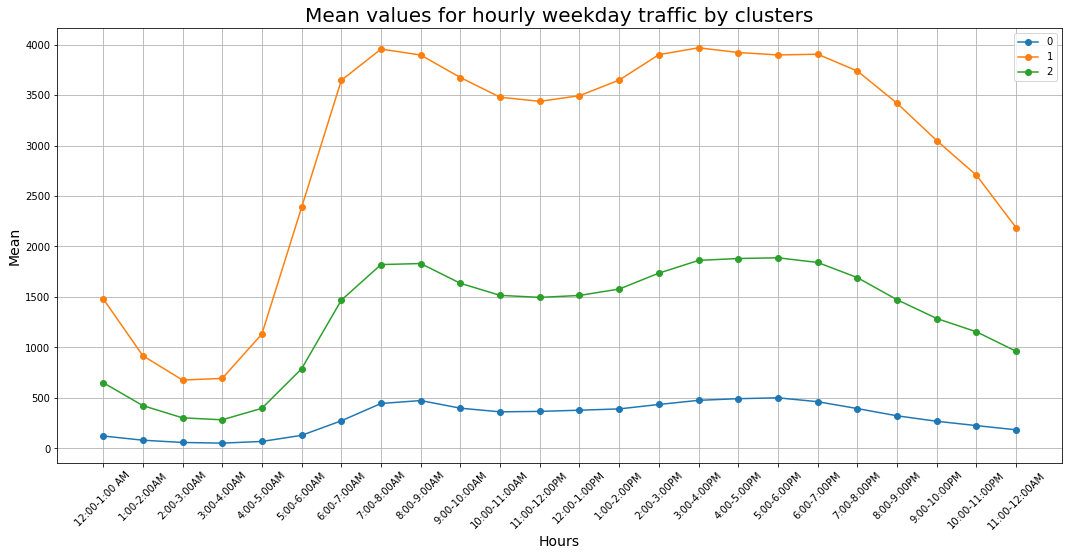

In [65]:
plt.figure(figsize=(18,8))
plt.plot(weekday_mean, marker='o')
plt.title('Mean values for hourly weekday traffic by clusters', fontsize = 20)
plt.xlabel('Hours', fontsize = 14)
plt.ylabel('Mean', fontsize =14)
plt.xticks(rotation = 45)
plt.legend([0,1,2],loc='upper right')
plt.grid(True)
plt.show()

In [38]:
shp = gpd.read_file('/content/drive/MyDrive/Machine Learning For Cities/final/lion/lion.shp')

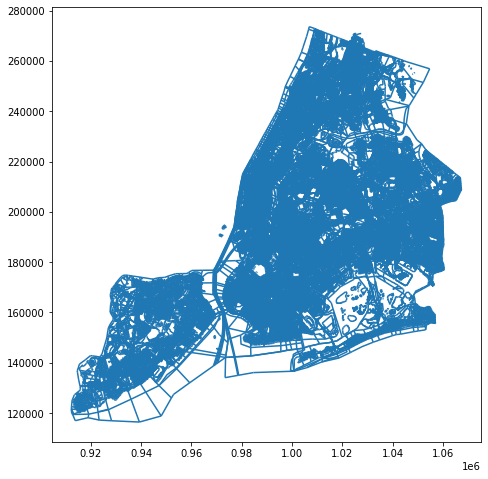

In [39]:
shp.plot(figsize=(8,8))

In [40]:
!pip install matplotlib-venn

In [41]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 148486 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [42]:

# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [43]:
pip install pysal

     |████████████████████████████████| 2.4 MB 6.0 MB/s 
     |████████████████████████████████| 95 kB 3.2 MB/s 
     |████████████████████████████████| 60 kB 6.5 MB/s 
     |████████████████████████████████| 55 kB 3.0 MB/s 
     |████████████████████████████████| 164 kB 53.1 MB/s 
     |████████████████████████████████| 45 kB 2.5 MB/s 
     |████████████████████████████████| 41 kB 499 kB/s 
     |████████████████████████████████| 209 kB 55.2 MB/s 
     |████████████████████████████████| 5.7 MB 34.1 MB/s 
     |████████████████████████████████| 64 kB 3.0 MB/s 
     |████████████████████████████████| 138 kB 73.0 MB/s 
     |████████████████████████████████| 226 kB 72.0 MB/s 
     |████████████████████████████████| 240 kB 68.7 MB/s 
     |████████████████████████████████| 56.1 MB 1.3 MB/s 
     |████████████████████████████████| 183 kB 58.8 MB/s 
     |████████████████████████████████| 2.0 MB 54.6 MB/s 
     |████████████████████████████████| 111 kB 60.6 MB/s 
     |█████████████████████

In [44]:
shp['SegmentID']=shp['SegmentID'].apply(int)

In [45]:
join= shp[['geometry','SegmentID']].merge(weekend_ori_seg, left_on='SegmentID', right_on='Segment ID')
join

,geometry,SegmentID,Unnamed: 0,Segment ID,day,LBoro,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,5:00-6:00AM,6:00-7:00AM,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,10:00-11:00AM,11:00-12:00PM,12:00-1:00PM,1:00-2:00PM,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,daily_volume,label
0,"LINESTRING (1021588.746 260156.719, 1021607.78...",132595,1940,132595,Weekend,2.0,283.3125,237.312500,195.6250,168.312500,168.625000,155.562500,175.4375,211.687500,257.7500,311.625000,377.812500,404.7500,407.0000,435.1875,454.3125,434.9375,428.8750,415.6875,416.9375,399.375,379.1250,346.1875,306.9375,275.6875,7648.0625,0
1,"LINESTRING (1019967.833 260077.342, 1020193.11...",81384,1475,81384,Weekend,2.0,92.0000,55.437500,48.4375,44.437500,48.750000,40.000000,68.6875,94.250000,124.0625,151.500000,170.125000,197.8750,210.0625,237.5000,257.1250,272.0625,281.8125,268.3125,284.1250,266.000,202.0625,138.4375,131.8125,101.3750,3786.2500,0
2,"LINESTRING (1025706.323 241096.311, 1025659.48...",86554,1517,86554,Weekend,2.0,295.2500,252.333333,218.5000,188.333333,192.416667,193.083333,213.0000,263.833333,305.7500,382.333333,409.666667,437.7500,538.1000,557.2000,559.9000,539.3000,514.1000,510.7000,479.3000,451.000,405.1000,344.8000,309.6000,271.8000,8836.5000,0
3,"LINESTRING (1003387.798 234704.290, 1003494.47...",69588,1213,69588,Weekend,2.0,80.7500,68.250000,56.2500,55.250000,85.750000,62.500000,67.0000,65.250000,92.2500,178.000000,240.500000,341.5000,383.5000,407.2500,415.2500,388.7500,324.5000,278.2500,217.0000,100.750,89.2500,64.5000,69.0000,55.2500,4186.5000,0
4,"LINESTRING (1023263.054 259321.780, 1023348.20...",88020,1540,88020,Weekend,2.0,108.7500,83.562500,62.6250,47.687500,50.875000,47.812500,64.0000,96.937500,138.5000,183.000000,218.000000,228.4375,235.1875,254.0625,281.6250,268.7500,270.3125,262.4375,249.3750,233.500,197.4375,173.1875,142.5625,125.5625,4024.1875,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,"LINESTRING (932607.818 136334.681, 932544.839 ...",9012809,3257,9012809,Weekend,5.0,626.0000,362.000000,221.0000,132.000000,82.500000,137.750000,252.2500,464.250000,734.2500,1082.500000,1362.750000,1577.2500,1919.0000,1830.2500,1829.0000,1944.7500,2069.2500,1704.0000,1804.5000,1609.500,1362.2500,984.5000,777.7500,669.2500,25538.5000,2
1911,"LINESTRING (938269.536 165211.482, 938199.874 ...",9013838,3291,9013838,Weekend,5.0,1579.5000,1028.000000,697.2500,551.000000,603.750000,908.000000,1573.7500,2383.500000,3221.7500,3946.750000,4279.750000,4752.0000,4398.7500,4747.5000,4737.0000,4526.5000,4615.5000,4423.7500,4018.7500,3754.000,3198.2500,2717.2500,2405.5000,1804.0000,70871.7500,1
1912,"LINESTRING (938295.126 165104.271, 938271.702 ...",9013840,3293,9013840,Weekend,5.0,1761.7500,1132.000000,902.7500,825.000000,956.000000,1343.000000,1856.2500,2212.250000,2816.0000,3381.750000,3910.750000,4212.5000,4410.0000,4614.7500,4840.7500,4791.0000,4847.5000,4929.5000,4653.5000,4724.000,4116.5000,3399.2500,2802.0000,2196.2500,75635.0000,1
1913,"LINESTRING (930935.994 138516.810, 930814.856 ...",218038,2945,218038,Weekend,5.0,40.8750,23.437500,14.2500,8.937500,7.187500,10.625000,22.2500,44.000000,89.0625,128.062500,167.875000,177.0625,188.3750,184.0000,177.3125,166.6875,158.7500,168.0000,151.7500,123.875,99.3750,70.6250,56.3125,41.8750,2320.5625,0


In [46]:
join=join.dropna(subset=['label'])
join

,geometry,SegmentID,Unnamed: 0,Segment ID,day,LBoro,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,5:00-6:00AM,6:00-7:00AM,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,10:00-11:00AM,11:00-12:00PM,12:00-1:00PM,1:00-2:00PM,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,daily_volume,label
0,"LINESTRING (1021588.746 260156.719, 1021607.78...",132595,1940,132595,Weekend,2.0,283.3125,237.312500,195.6250,168.312500,168.625000,155.562500,175.4375,211.687500,257.7500,311.625000,377.812500,404.7500,407.0000,435.1875,454.3125,434.9375,428.8750,415.6875,416.9375,399.375,379.1250,346.1875,306.9375,275.6875,7648.0625,0
1,"LINESTRING (1019967.833 260077.342, 1020193.11...",81384,1475,81384,Weekend,2.0,92.0000,55.437500,48.4375,44.437500,48.750000,40.000000,68.6875,94.250000,124.0625,151.500000,170.125000,197.8750,210.0625,237.5000,257.1250,272.0625,281.8125,268.3125,284.1250,266.000,202.0625,138.4375,131.8125,101.3750,3786.2500,0
2,"LINESTRING (1025706.323 241096.311, 1025659.48...",86554,1517,86554,Weekend,2.0,295.2500,252.333333,218.5000,188.333333,192.416667,193.083333,213.0000,263.833333,305.7500,382.333333,409.666667,437.7500,538.1000,557.2000,559.9000,539.3000,514.1000,510.7000,479.3000,451.000,405.1000,344.8000,309.6000,271.8000,8836.5000,0
3,"LINESTRING (1003387.798 234704.290, 1003494.47...",69588,1213,69588,Weekend,2.0,80.7500,68.250000,56.2500,55.250000,85.750000,62.500000,67.0000,65.250000,92.2500,178.000000,240.500000,341.5000,383.5000,407.2500,415.2500,388.7500,324.5000,278.2500,217.0000,100.750,89.2500,64.5000,69.0000,55.2500,4186.5000,0
4,"LINESTRING (1023263.054 259321.780, 1023348.20...",88020,1540,88020,Weekend,2.0,108.7500,83.562500,62.6250,47.687500,50.875000,47.812500,64.0000,96.937500,138.5000,183.000000,218.000000,228.4375,235.1875,254.0625,281.6250,268.7500,270.3125,262.4375,249.3750,233.500,197.4375,173.1875,142.5625,125.5625,4024.1875,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,"LINESTRING (932607.818 136334.681, 932544.839 ...",9012809,3257,9012809,Weekend,5.0,626.0000,362.000000,221.0000,132.000000,82.500000,137.750000,252.2500,464.250000,734.2500,1082.500000,1362.750000,1577.2500,1919.0000,1830.2500,1829.0000,1944.7500,2069.2500,1704.0000,1804.5000,1609.500,1362.2500,984.5000,777.7500,669.2500,25538.5000,2
1911,"LINESTRING (938269.536 165211.482, 938199.874 ...",9013838,3291,9013838,Weekend,5.0,1579.5000,1028.000000,697.2500,551.000000,603.750000,908.000000,1573.7500,2383.500000,3221.7500,3946.750000,4279.750000,4752.0000,4398.7500,4747.5000,4737.0000,4526.5000,4615.5000,4423.7500,4018.7500,3754.000,3198.2500,2717.2500,2405.5000,1804.0000,70871.7500,1
1912,"LINESTRING (938295.126 165104.271, 938271.702 ...",9013840,3293,9013840,Weekend,5.0,1761.7500,1132.000000,902.7500,825.000000,956.000000,1343.000000,1856.2500,2212.250000,2816.0000,3381.750000,3910.750000,4212.5000,4410.0000,4614.7500,4840.7500,4791.0000,4847.5000,4929.5000,4653.5000,4724.000,4116.5000,3399.2500,2802.0000,2196.2500,75635.0000,1
1913,"LINESTRING (930935.994 138516.810, 930814.856 ...",218038,2945,218038,Weekend,5.0,40.8750,23.437500,14.2500,8.937500,7.187500,10.625000,22.2500,44.000000,89.0625,128.062500,167.875000,177.0625,188.3750,184.0000,177.3125,166.6875,158.7500,168.0000,151.7500,123.875,99.3750,70.6250,56.3125,41.8750,2320.5625,0


In [47]:
shp.shape

(233447, 122)

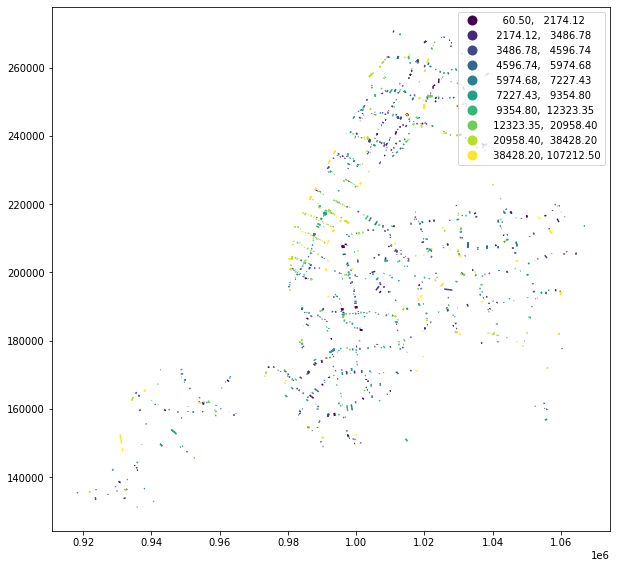

In [48]:
fig, ax = plt.subplots(1, figsize=(10,10))
join.plot(ax=ax, column='daily_volume', k=10, scheme='Quantiles', legend=True)

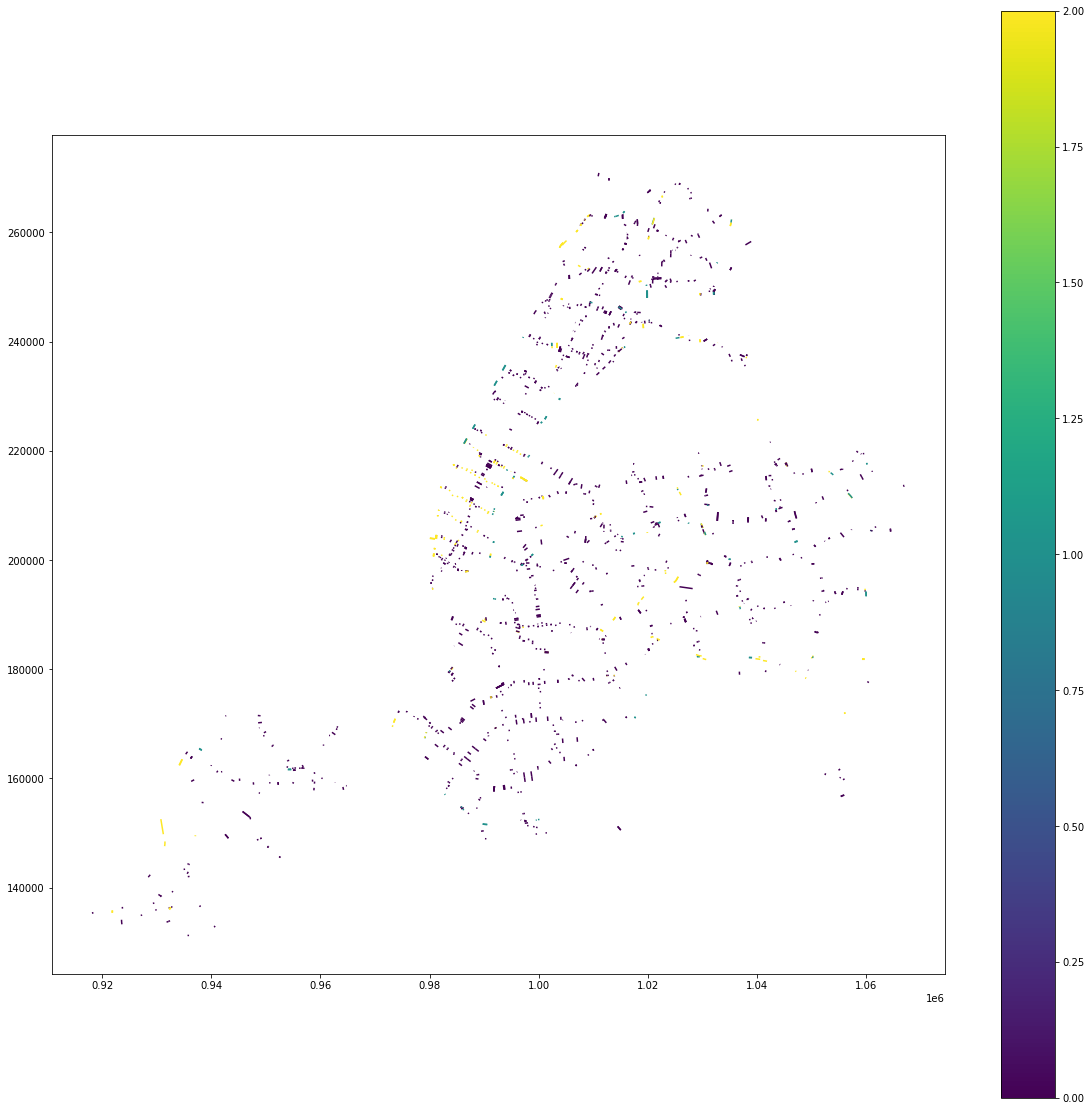

In [49]:
fig, ax = plt.subplots(1, figsize=(20,20))
join.plot(ax=ax, column='label',k=3,legend=True)